# São Paulo Real Estate - Sale/Rent - April 2019

**D2APR: Aprendizado de Máquina e Reconhecimento de Padrões**

Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

## 1. Informações Gerais

### 1.1. Contexto do problema

### 1.2. Conhecendo  o dataset

O [Dataset](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019) contem cerca de 13.000 registros referentes a venda e aluguel de apartamentos na cidade de São Paulo (Brasil). Os dados foram coletados de diversas fontes, principalmente de sites de classificados de imóveis. Todos os dados foram coletados no mês de abril de 2019.


### 1.3. Principais atributos e seus tipos

Os dados dos imóveis possuem 16 atributos

* Price (int): Preço total anunciado em reais
* Condo (int): Condomínio em reais (Valores desconhecidos são marcados como zero)
* Size (int): Tamanho da propriedade em m² (Somente áreas privadas)
* Rooms (int): Número de Quartos
* Toilets (int): Númerto total de banheiros 
* Suites (int): Número de suites (Quartos com banheiros privativos)
* Parking (int): Número de vagas de estacionamento
* Elevator (binario): Se existe elevador (1 - sim, 0 - não)
* Furnished (binario): Se o imóvel é mobiliado (1 - sim, 0 - não)
* Swimming Pool (binario): Se existe piscina na propriedade (1 - sim, 0 - não)
* New (binario): Se o apartamento é novo (1 - sim, 0 - não) 
* District (string) : Bairro e cidade que o imóvel está localizado
* Negotiation Type (string): Alugel ou venda
* Property Type (string): Tipo de propriedade
* Latitude (float): Latitude do imóvel
* Longitude (float): Longitude do imóvel 

### 1.4 Objetivo

O Objetivo desse estudo é prever o valor dos apartamentos (*Price*) com base nas suas características, possibilitando a automatização deste processo. A criação de um modelo pode reduzir os custos de cotação realizado por empresas para estimar um valor aos imóveis.

## 2. Limpeza da base e Análise exploratória

### 2.1. Visão geral dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/ciencia-dados-ifsp-grupo5/Sao-Paulo-Real-Estate---Sale-Rent---April-2019/blob/main/Data/sao-paulo-properties-april-2019.csv?raw=true')

print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')
df.head()

O dataset possui 13640 linhas e 16 colunas


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo


### 2.2. Limpeza dos dados

In [4]:
# Dados nulos
print(f'O dataset possui {df.isnull().sum().sum()} dados Nulos')

O dataset possui 0 dados Nulos


In [5]:
# Dados duplicados
print(f'O dataset possui {df.duplicated().sum()} dados duplicados')

O dataset possui 319 dados duplicados


In [6]:
df[df.duplicated(keep=False)].sort_values(by='Price')

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
255,800,100,35,2,2,1,1,0,0,0,0,Itaquera/São Paulo,rent,apartment,-23.529224,-46.451101
9687,800,100,35,2,2,1,1,0,0,0,0,Itaquera/São Paulo,rent,apartment,-23.529224,-46.451101
3172,800,0,34,1,1,0,0,0,0,0,0,São Lucas/São Paulo,rent,apartment,-23.589273,-46.552004
3174,800,0,34,1,1,0,0,0,0,0,0,São Lucas/São Paulo,rent,apartment,-23.589273,-46.552004
286,800,220,60,2,2,1,1,0,0,0,0,Jardim Helena/São Paulo,rent,apartment,-23.463087,-46.415487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,1072140,0,134,4,3,2,2,1,0,1,0,Lapa/São Paulo,sale,apartment,-23.517324,-46.712504
9048,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005
9049,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005
9069,1982000,1800,160,4,4,3,2,1,0,0,1,Pinheiros/São Paulo,sale,apartment,-23.550855,-46.680005


In [7]:
df.drop_duplicates(inplace=True)
print(f'Após a exlusão dos duplicados o dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas')

Após a exlusão dos duplicados o dataset possui 13321 linhas e 16 colunas


In [8]:
# Convertendo espaço por "_" no nome das colunas
df.columns = df.columns.str.replace(' ','_')
df.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


### 2.3. Separação da base de teste

Após a limpeza dos dados duplicados e dos valores vazios, vamos começar a análise exploratória. Antes de começar a analisar os dados, vamos dividir a base em dados de treino e teste. Para montar um modelo que seja consistente os dados de testes não devem ser usados para analisar e preparar a base, de modo que a divisão deve ser feita anteriormente.
O parâmetro **Negotiation_Type** define se o imóvel é para *venda* ou *aluguel* e ele afeta muito a variável alvo *Price*. Dessa forma vamos estratificar a amostra nesse parâmetro, garantindo a homogeneidade em relação a esse atributo.

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Negotiation_Type'], random_state=13)

print(f'Temos {df_train.shape} dados de treino e {df_test.shape} dados de teste')

Temos (10656, 16) dados de treino e (2665, 16) dados de teste


In [10]:
df_train['Negotiation_Type'].value_counts()/len(df_train['Negotiation_Type'])

rent    0.526933
sale    0.473067
Name: Negotiation_Type, dtype: float64

In [11]:
df_test['Negotiation_Type'].value_counts()/len(df_test['Negotiation_Type'])

rent    0.526829
sale    0.473171
Name: Negotiation_Type, dtype: float64

### 2.4. Análise exploratória

#### 2.4.1. Variáveis Numéricas

In [12]:
num_atri = ['Price', 'Condo', 'Size', 'Latitude', 'Longitude', 'Rooms', 'Toilets', 'Suites', 'Parking']
df_train[num_atri]

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
7220,225000,270,50,-23.608192,-46.523508,2,2,1,1
9132,1500,370,50,-23.549123,-46.619121,2,2,1,1
5206,1800,540,50,-23.562313,-46.601342,2,2,1,1
135,1000,0,70,-23.551332,-46.477462,2,2,1,1
4833,2500,850,73,-23.531443,-46.726738,2,2,1,1
...,...,...,...,...,...,...,...,...,...
4716,3800,880,60,-23.560533,-46.674545,2,1,0,1
4774,950,547,64,-23.488581,-46.719538,2,1,0,0
3379,11500,1900,222,-23.624992,-46.675662,2,3,2,4
960,1500,350,48,-23.687211,-46.668608,2,2,1,1


In [13]:
df_train[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00,10656.00
mean,290057.67,697.76,84.74,-22.04,-43.51,2.32,2.08,0.99,1.40
std,592689.31,767.87,58.86,5.95,11.64,0.78,0.96,0.84,0.84
min,480.00,0.00,30.00,-46.75,-58.36,1.00,1.00,0.00,0.00
25%,1900.00,293.00,50.00,-23.59,-46.68,2.00,2.00,1.00,1.00
50%,9000.00,512.00,65.00,-23.55,-46.64,2.00,2.00,1.00,1.00
75%,366775.00,850.00,94.00,-23.52,-46.56,3.00,2.00,1.00,2.00
max,10000000.00,9500.00,852.00,0.00,0.00,10.00,8.00,6.00,9.00


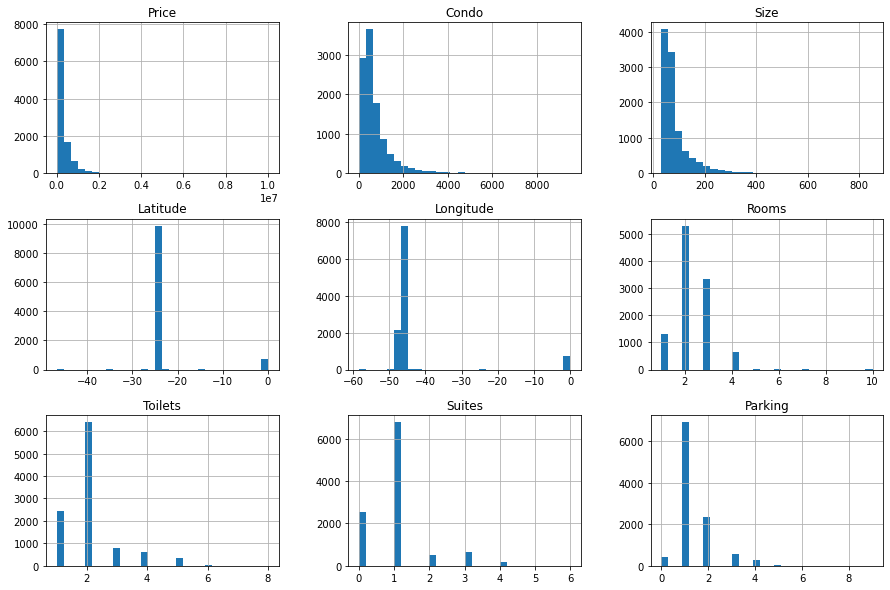

In [14]:
df_train[num_atri].hist(bins=30, figsize=(15,10))
display()

Text(0.5, 1.0, 'Size - Boxplot')

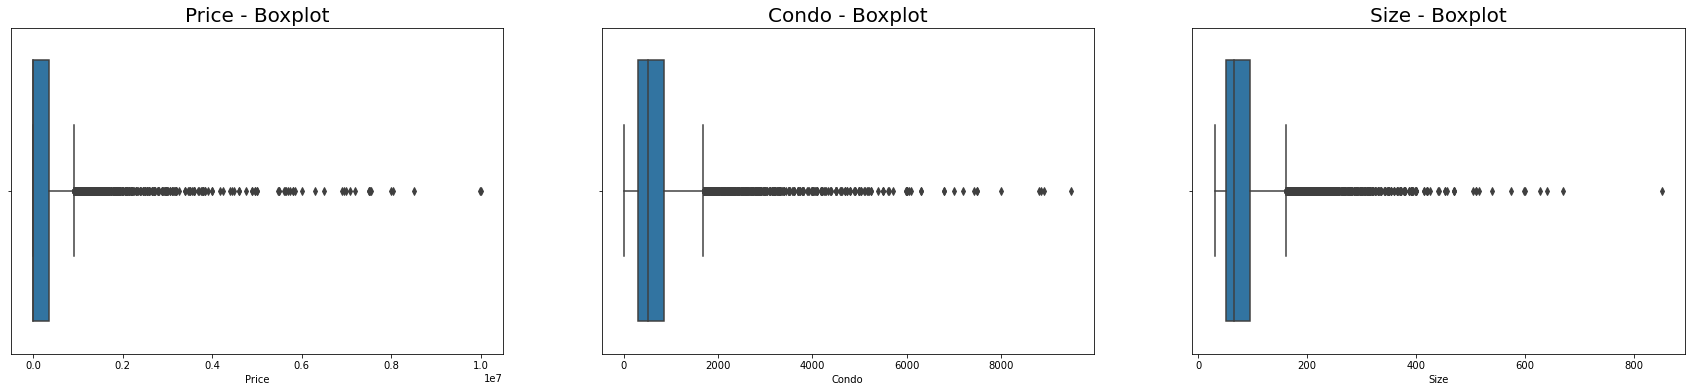

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

sns.boxplot(data = df_train, x='Price', ax = ax[0])
ax[0].set_title('Price - Boxplot', fontsize = 20)

sns.boxplot(data = df_train, x='Condo', ax = ax[1])
ax[1].set_title('Condo - Boxplot', fontsize = 20)

sns.boxplot(data = df_train, x='Size', ax = ax[2])
ax[2].set_title('Size - Boxplot', fontsize = 20)

As variáveis **Price**, **Condo** e **Size** possuem formato de uma curva assimétrica à esquerda. A análise dos boxplot dessas variáveis apontam vários outliers, porém nenhum deles é muito distante dos valores. Optamos por não excluir nenhum dos valores.

A **Latitude** e **Longitude** possui uma distribuição muito concentrada e alguns valores zerados que podem ser interpretados como falta de informação das variáveis. 

**Rooms**, **Toilets**, **Suites** e **Parking** são variáveis que possuem uma moda bem evidente e támbem se assemelham a uma curva assimétrica à esquerda, porém com uma quantidade reduzida de valores. Os seus valores mínimos e máximos estão dentro dos valores esperados.

#### 2.4.2. Variáveis Categóricas

In [16]:
cat_atri = ['Elevator', 'Furnished', 'Swimming_Pool', 'New', 'District', 'Negotiation_Type', 'Property_Type']
df_train[cat_atri].head(3)

,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type
7220,0,1,1,0,Jardim Ângela/São Paulo,sale,apartment
9132,1,0,0,0,Brás/São Paulo,rent,apartment
5206,0,0,1,0,Mooca/São Paulo,rent,apartment


In [17]:
for i in cat_atri:
    print(i)
    print(f'{df_train[i].value_counts()}\n')

Elevator
0    6849
1    3807
Name: Elevator, dtype: int64

Furnished
0    9082
1    1574
Name: Furnished, dtype: int64

Swimming_Pool
1    5515
0    5141
Name: Swimming_Pool, dtype: int64

New
0    10498
1      158
Name: New, dtype: int64

District
Moema/São Paulo              238
Mooca/São Paulo              229
Brooklin/São Paulo           202
Pinheiros/São Paulo          196
Casa Verde/São Paulo         194
                            ... 
Jardim São Luis/São Paulo     34
Lajeado/São Paulo             33
Grajaú/São Paulo              27
São Domingos/São Paulo        25
Perus/São Paulo               13
Name: District, Length: 96, dtype: int64

Negotiation_Type
rent    5615
sale    5041
Name: Negotiation_Type, dtype: int64

Property_Type
apartment    10656
Name: Property_Type, dtype: int64



In [18]:
print(f'Existem {len(df_train["District"].unique())} valores distintos de "District" no dataset')

Existem 96 valores distintos de "District" no dataset


<AxesSubplot:xlabel='Price', ylabel='Negotiation_Type'>

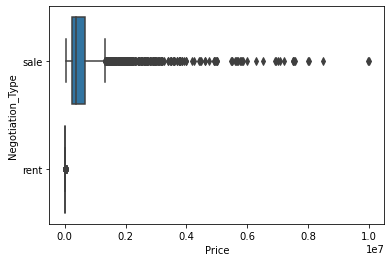

In [19]:
sns.boxplot(data=df_train, x='Price', y='Negotiation_Type')

**Elevator**, **Furnished**, **Swimming Pool** e **New** são variáveis binárias, ou seja, os valores são 0 (negativo) ou 1 (positivo). 

A variável **Negotiation Type** também possui dois valores. Um fato interessante sobre esta variável é que dependendo do tipo, a variável alvo possui valores bem diferentes. O intervalo de preços para aluguel é bem inferior ao de venda.

Dentro de **District** existem 96 bairros diferentes, sendo *Moema* com maior número de ocorrências (238) e Perus com a menor quantidade (13).

A coluna **Property Type** possui um valor único, visto que todos os imóveis da base são apartamentos.

### 2.5. Análise por *Negotiation Type*

A partir de agora vamos dividir a análise exploratória em duas partes, a primeira será referente a apartamentos para alugar e a segunda para compra. Visto que a variável alvo é muito dependente do tipo de negociação do imóvel, vamos fazer análises separadas para encontrar as principais variáveis correlacionadas e como está a distribuição das demais

#### 2.5.1. Aluguel (**Rent**)

In [20]:
df_rent = df_train.query('Negotiation_Type == "rent"')
df_rent.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
9132,1500,370,50,2,2,1,1,1,0,0,0,Brás/São Paulo,rent,apartment,-23.549123,-46.619121
5206,1800,540,50,2,2,1,1,0,0,1,0,Mooca/São Paulo,rent,apartment,-23.562313,-46.601342
135,1000,0,70,2,2,1,1,0,0,0,0,Cidade Líder/São Paulo,rent,apartment,-23.551332,-46.477462


In [21]:
df_rent[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00,5615.00
mean,3131.41,838.17,90.54,-22.02,-43.46,2.32,2.12,1.04,1.47
std,3636.16,850.38,65.27,6.01,11.75,0.83,1.00,0.89,0.91
min,480.00,0.00,30.00,-46.75,-58.36,1.00,1.00,0.00,0.00
25%,1370.00,400.00,52.00,-23.60,-46.69,2.00,2.00,1.00,1.00
50%,2000.00,600.00,68.00,-23.56,-46.65,2.00,2.00,1.00,1.00
75%,3450.00,1000.00,101.00,-23.52,-46.59,3.00,2.00,1.00,2.00
max,50000.00,9500.00,852.00,0.00,0.00,10.00,8.00,5.00,9.00


<AxesSubplot:>

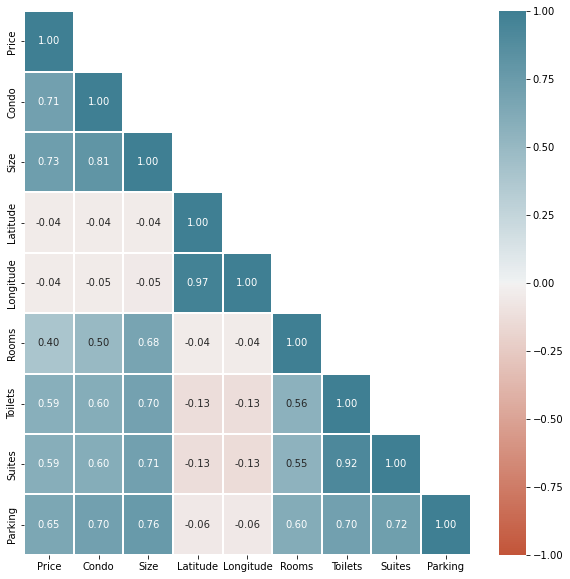

In [22]:
plt.figure(figsize=(10, 10))

mask = np.zeros_like(df_rent[num_atri].corr())
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(df_rent[num_atri].corr(), mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot=True, fmt='.2f')

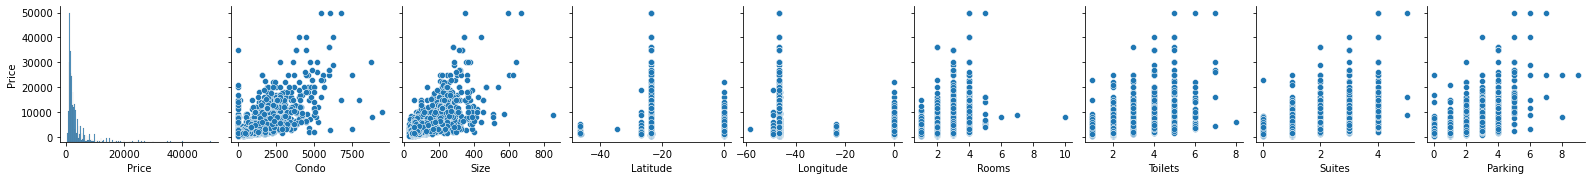

In [23]:
sns.pairplot(df_rent, y_vars=["Price"], x_vars=num_atri)

Os apartamentos para alugar possuem uma alta correlação com as características internas do imóvel (tamanho, quartos, banheiros, suites, estacionamentos). O valor do condomínio também possui uma correlação positiva com o preço do imóvel.

In [24]:
df_rent.groupby('Elevator')['Price'].describe().T.round(2)

Elevator,0,1
count,3900.00,1715.00
mean,3061.07,3291.36
std,3646.06,3609.51
min,480.00,600.00
25%,1300.00,1500.00
50%,1900.00,2100.00
75%,3200.00,3600.00
max,50000.00,50000.00


In [25]:
df_rent.groupby('Furnished')['Price'].describe().T.round(2)

Furnished,0,1
count,4631.00,984.00
mean,2854.37,4435.23
std,3353.42,4525.47
min,480.00,720.00
25%,1300.00,1937.50
50%,1800.00,3000.00
75%,3000.00,5000.00
max,50000.00,36000.00


In [26]:
df_rent.groupby('Swimming_Pool')['Price'].describe().T.round(2)

Swimming_Pool,0,1
count,2844.00,2771.00
mean,2405.02,3876.94
std,2846.90,4168.97
min,480.00,500.00
25%,1200.00,1700.00
50%,1500.00,2500.00
75%,2500.00,4200.00
max,40000.00,50000.00


In [27]:
df_rent.groupby('New')['Price'].describe().T.round(2)

New,0,1
count,5610.00,5.00
mean,3132.30,2130.00
std,3637.62,586.94
min,480.00,1250.00
25%,1370.00,1800.00
50%,2000.00,2500.00
75%,3500.00,2500.00
max,50000.00,2600.00


In [28]:
df_rent.groupby('District')['Price'].describe()[['count','mean']].sort_values(by='mean', ascending=False)

,count,mean
District,,
Itaim Bibi/São Paulo,111.0,8717.342342
Alto de Pinheiros/São Paulo,109.0,8138.412844
Moema/São Paulo,137.0,8041.416058
Iguatemi/São Paulo,27.0,7458.370370
Jardim Paulista/São Paulo,120.0,7335.700000
...,...,...
Guaianazes/São Paulo,6.0,970.833333
Lajeado/São Paulo,5.0,960.000000
José Bonifácio/São Paulo,31.0,953.838710


Em relação as variáveis categóricas, temos que apartamentos mobiliados e com piscina possuem um preço mais caro. O Elevador não possui grande relação com o valor do aluguel. Sobre a condição do apartamento, temos poucas amostras de *apartamentos novos para alugar*, de modo que não é possível fazer essa comparação.

É possível encontrar uma grande diferença no aluguel em relação aos bairros, lugares consideramos mais "nobres" como Itaim Bibi e Alto de Pinheiros possuem um aluguel médio mais alto em relação a Itaim Paulista e Grajaú

#### 2.5.2. Venda (**Sale**)


In [29]:
df_sale = df_train.query('Negotiation_Type == "sale"')
df_sale.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
7220,225000,270,50,2,2,1,1,0,1,1,0,Jardim Ângela/São Paulo,sale,apartment,-23.608192,-46.523508
12030,422400,500,74,3,2,1,1,0,0,1,0,Brás/São Paulo,sale,apartment,-23.545418,-46.616934
12732,84000,0,49,2,1,0,1,0,1,0,0,Cidade Tiradentes/São Paulo,sale,apartment,0.000000,0.000000


In [30]:
df_sale[num_atri].describe().round(2)

,Price,Condo,Size,Latitude,Longitude,Rooms,Toilets,Suites,Parking
count,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00,5041.00
mean,609655.16,541.37,78.27,-22.07,-43.57,2.32,2.04,0.93,1.33
std,740770.70,628.15,49.99,5.89,11.51,0.71,0.91,0.77,0.75
min,45000.00,0.00,30.00,-46.73,-49.34,1.00,1.00,0.00,0.00
25%,250000.00,160.00,50.00,-23.59,-46.67,2.00,2.00,1.00,1.00
50%,380000.00,400.00,62.00,-23.55,-46.63,2.00,2.00,1.00,1.00
75%,679900.00,700.00,87.00,-23.51,-46.53,3.00,2.00,1.00,2.00
max,10000000.00,8920.00,505.00,0.00,0.00,6.00,7.00,6.00,7.00


<AxesSubplot:>

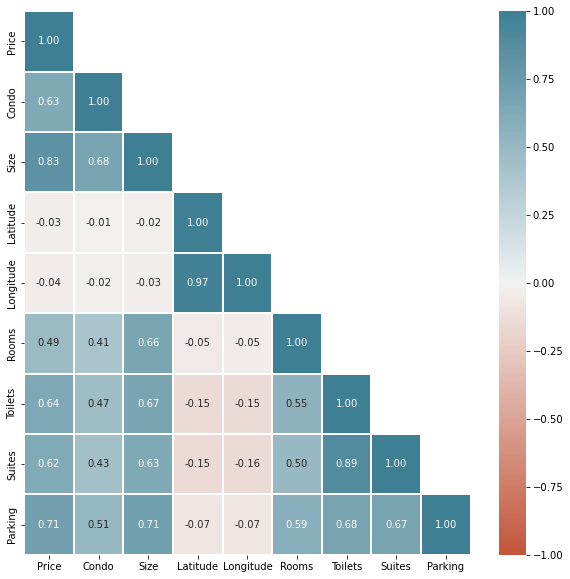

In [31]:
plt.figure(figsize=(10, 10))

mask = np.zeros_like(df_sale[num_atri].corr())
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(df_sale[num_atri].corr(), mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot=True, fmt='.2f')

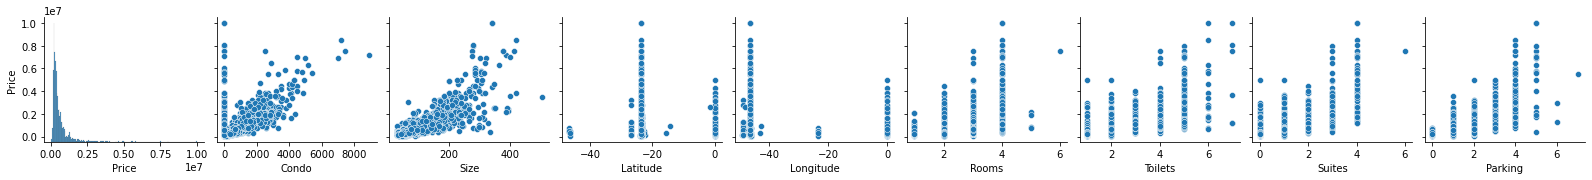

In [32]:
sns.pairplot(df_sale,y_vars=["Price"], x_vars = num_atri)

Os apartamentos para venda possuem uma alta correlação com as características internas do imóvel (tamanho, quartos, banheiros, suites, estacionamentos). O valor do condomínio também possui uma correlação positiva com o preço do imóvel.

In [33]:
df_sale.groupby('Elevator')['Price'].describe().T.round(2)

Elevator,0,1
count,2949.00,2092.00
mean,571978.15,662766.77
std,715544.00,771993.91
min,45000.00,68000.00
25%,239000.00,279742.50
50%,358000.00,430000.00
75%,635000.00,730000.00
max,10000000.00,9979947.00


In [34]:
df_sale.groupby('Furnished')['Price'].describe().T.round(2)

Furnished,0,1
count,4451.00,590.00
mean,592338.33,740294.43
std,734308.76,776096.82
min,47481.00,45000.00
25%,240500.00,330000.00
50%,370000.00,500000.00
75%,650000.00,850000.00
max,10000000.00,8039200.00


In [35]:
df_sale.groupby('Swimming_Pool')['Price'].describe().T.round(2)

Swimming_Pool,0,1
count,2297.0,2744.00
mean,467906.4,728312.91
std,547184.8,852484.55
min,45000.0,68000.00
25%,210000.0,320000.00
50%,285000.0,470000.00
75%,500000.0,760000.00
max,10000000.0,9979947.00


In [36]:
df_sale.groupby('New')['Price'].describe().T.round(2)

New,0,1
count,4888.00,153.00
mean,614725.57,447667.01
std,747559.24,447513.23
min,45000.00,139900.00
25%,250000.00,199000.00
50%,385000.00,265999.00
75%,680000.00,567600.00
max,10000000.00,3050003.00


In [37]:
df_sale.groupby('District')['Price'].describe()[['count','mean']].round(2).sort_values(by='mean', ascending=False)

,count,mean
District,,
Iguatemi/São Paulo,15.0,3770329.80
Alto de Pinheiros/São Paulo,79.0,2448632.65
Jardim Paulista/São Paulo,68.0,1855117.65
Itaim Bibi/São Paulo,52.0,1812209.63
Vila Olimpia/São Paulo,31.0,1699720.94
...,...,...
São Rafael/São Paulo,28.0,198250.00
Guaianazes/São Paulo,62.0,195338.42
Artur Alvim/São Paulo,70.0,190741.39


Em relação as variáveis categóricas, temos que apartamentos mobiliados, com piscina e elevador possuem um preço mais caro.  Sobre a condição do apartamento, temos poucas amostras de *apartamentos novos para comprar*, de modo que não é possível fazer essa comparação.

É possível encontrar uma grande diferença no preço de venda dos apartamentos em relação aos bairros, lugares consideramos mais "nobres" como Iguatemi e Alto de Prinheiros possuem um valor médio de venda mais alto em relação a Cidade Tiradentes e Lajeado

### 2.6. Conclusão

O preço do imóvel possui uma alta correlação com as características do imóvel e conforme o aumento da quantidade de cômodos e atributos (estacionamento, piscina, mobília) o preço tende a aumentar. A base de dados possui um atributo fundamental para definir o preço final, se o imóvel está para vender ou alugar. Um atributo bem importante é o bairro onde o imóvel está localizado, possuindo um preço médio diferente dependendo do local. É possível que a divisão da base tenha ocultado algum bairro e quando submetidos a dados não vistos venha ocorrer alguma inconsistência. Vamos tratar essa possibilidade mais adiante.

Algumas colunas possuem uma relação menor com os dados. A latitude e longitude são numericamente pouco significante, podendo ser substituida pela informação do bairro em que o imóvel está localizado. A coluna `Property_Type` não oferece nenhuma informação adicional pois possui um valor único. Por fim, pouco se consegue extrair da informação sobre o imóvel ser novo ou não pois a quantidade de imóveis novos são bem inferiores quando comparadas com usados.

## 3. Preparação da Base

In [38]:
df_prep = df_train.copy()

### 3.1. Exclusão de colunas

Vamos remover algumas colunas que não favorecem a criação do modelo. São elas 
* Latitude
* Longitude
* Property_Type

In [39]:
df_prep = df_prep.drop(columns=['Property_Type','Latitude','Longitude'])
df_prep.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type
7220,225000,270,50,2,2,1,1,0,1,1,0,Jardim Ângela/São Paulo,sale
9132,1500,370,50,2,2,1,1,1,0,0,0,Brás/São Paulo,rent
5206,1800,540,50,2,2,1,1,0,0,1,0,Mooca/São Paulo,rent


### 3.2. Transformação de variáveis

A variável `district` é uma variável categórica e vamos fazer o tratamento por meio do *one hot encoding* para transformar em colunas binárias. Essa transformação faz com que cada um dos valores dessa *feature* seja transformado em uma coluna binária, preenchida com o valor de **1** o valor verdadeiro e **0** as demais colunas. Para tratar a possibilidade de algum valor de *district* não estar na base de treino e apareça nos testes, vamos usar o parâmetro `handle_unknown = 'ignore'`, de modo que caso isso ocorra, todas as colunas referentes terão o valor **0**.


In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
df_prep_OHE = encoder.fit_transform(df_prep[['District']])

In [41]:
df_prep_OHE

<10656x96 sparse matrix of type '<class 'numpy.float64'>'
	with 10656 stored elements in Compressed Sparse Row format>

In [42]:
encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

### 3.3. Feature Scaling

As variáveis númericas possuem dimensões muito diferentes. Desse modo é interessante fazer uma transformação para que as unidades não possuam intervalos de dados muito distintos. Como vimos na análise exploratória, os atributos **Condo** e **Size** possuem vários outliers. Dessa forma optamos por utilizar o *Z-Score Normalization* para transformar as variáveis.

In [43]:
from sklearn.preprocessing import StandardScaler

num_atri = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']

scaler = StandardScaler()

df_prep[num_atri] = scaler.fit_transform(df_prep[num_atri])
df_prep[num_atri]

,Condo,Size,Rooms,Toilets,Suites,Parking
7220,-0.557105,-0.590213,-0.409082,-0.085565,0.014250,-0.478990
9132,-0.426868,-0.590213,-0.409082,-0.085565,0.014250,-0.478990
5206,-0.205465,-0.590213,-0.409082,-0.085565,0.014250,-0.478990
135,-0.908745,-0.250407,-0.409082,-0.085565,0.014250,-0.478990
4833,0.198269,-0.199436,-0.409082,-0.085565,0.014250,-0.478990
...,...,...,...,...,...,...
4716,0.237340,-0.420310,-0.409082,-1.126415,-1.181436,-0.478990
4774,-0.196349,-0.352349,-0.409082,-1.126415,-1.181436,-1.673214
3379,1.565757,2.332124,-0.409082,0.955285,1.209937,3.103684
960,-0.452915,-0.624194,-0.409082,-0.085565,0.014250,-0.478990


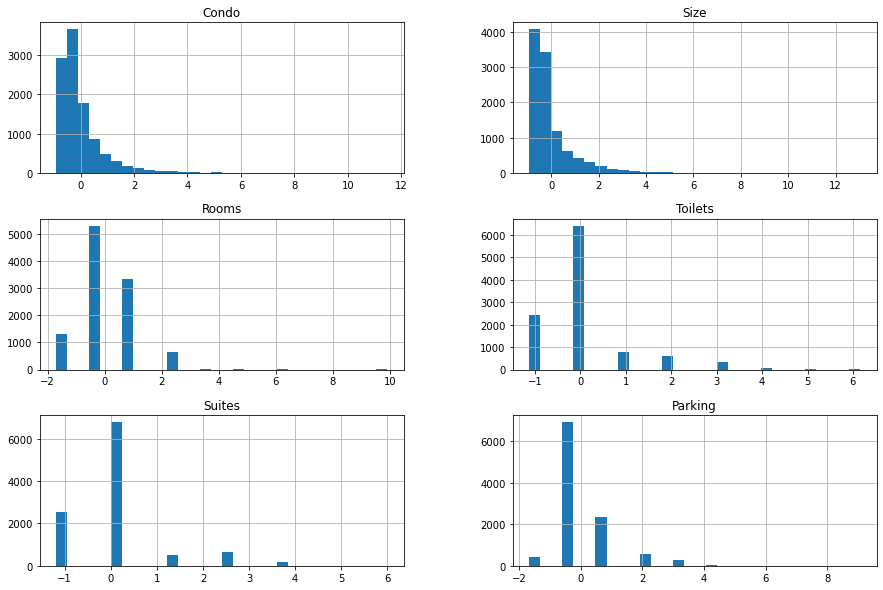

In [44]:
df_prep[num_atri].hist(bins=30, figsize=(15,10))
display()

### 3.4. Pipeline de pré-processamento

Para facilitar o tratamento dos dados, vamos criar um *Pipeline* que agrupa todas as transformações que fizemos nos dados.

As variáveis com categorias binárias serão utilizadas sem nenhuma transformação necessária. Dessa forma, vamos criar uma etapa extra no *Pipeline* que apenas informa que essas colunas devem ser mantidas. A partir da versão 0.23 do *scikit-learn* foi inserida uma forma mais elegante de resolver o problema de usar categorias binárias com o *OneHotEncoder*, com a adição da opção `drop='if_binary'`. Porém, para maior compatibilidade de execução do código em outras versões da biblioteca, além de problemas de compatibilidade com o uso desta opção quando `handle_unknow='ignore'`, decidimos separar de forma explícita as variáveis categóricas binárias.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [46]:
drop_attributes = ['Property_Type', 'Latitude', 'Longitude']
numerical_attributes = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']
categorical_attributes = ['District']
binary_attributes = ['Elevator', 'Furnished', 'Swimming_Pool', 'New']

prep_pipeline = ColumnTransformer([
    ('drop_features', 'drop', drop_attributes),
    ('scale_numerical', StandardScaler(), numerical_attributes),
    ('encode_categorical', OneHotEncoder(handle_unknown='ignore'), categorical_attributes),
    ('keep_features', 'passthrough', binary_attributes)
], remainder='drop')

## 4. Modelos de Aprendizado de Máquina

Agora iremos criar alguns modelos de aprendizado de máquina, utilizando diversos algorítmos e hiperparâmetros, e comparar seus resultados. Isso será feito com auxílio da classe **GridSearchCV** do *sklearn*.

Optamos por treinar modelos distintos para os dados de *venda* e *aluguel*, uma vez que tratam-se de negociações distintas. Um mesmo imóvel, dependendo do tipo de negociação a que está submetido, poderá ter um preço de anúncio completamente diferente.

### 4.1. Separação dos dados de treinamento

Primeiramente vamos separar o conjunto de dados de treinamento em dois outros conjuntos, para **sale** e **rent**.

In [47]:
df_sale = df_train[df_train.Negotiation_Type == 'sale'].copy()
df_rent = df_train[df_train.Negotiation_Type == 'rent'].copy()

Para cada tipo de negociação, precisamos separar as variáveis independentes (*features*) da variável dependente, que queremos predizer (*target*).

In [48]:
df_sale_features = df_sale.drop(columns=['Price'])
df_sale_target = df_sale['Price'].values

df_rent_features = df_rent.drop(columns=['Price'])
df_rent_target = df_rent['Price'].values

Vamos criar um vetor de tuplas com informações de cada tipo de negociação, que será conveninente para execução dos modelos.

In [49]:
# Array of tuples (negotiation type, features, target)
negotiations = [
    ('Sale', df_sale_features, df_sale_target),
    ('Rent', df_rent_features, df_rent_target)
]

### 4.2. Métrica de avaliação dos modelos

Para avaliar os modelos, vamos utilizar a **raiz do erro quadrático médio** (*Root Mean Squared Error (RMSE)*). Para isso, criamos uma função auxiliar que recebe a instância do *GridSearchCV* e retorna, para cada conjunto de parâmetros, o valor do RMSE e seu desvio padrão.

In [50]:
import re

def gridsearch_rmse(gridsearchcv):
    rmse_scores = np.array(
        [np.sqrt(-value) for key, value in gridsearchcv.cv_results_.items() if re.match(r'split\d+_test_score', key)]
    )
    
    rmse_dict = {
        "Parameters": gridsearchcv.cv_results_['params'],
        "RMSE": np.mean(rmse_scores, axis=0),
        "std": np.std(rmse_scores, axis=0)
    }
    
    return pd.DataFrame(rmse_dict)

def format_rmse(df, negotiation, best_index):
    return df.style.format(
        '{:,.2f}', subset=['RMSE', 'std']
    ).set_caption(
        f'<div style="margin-top:2em"><b>Negotiation type: {negotiation}</b><div style="margin-top:1em">'
    ).set_properties(
        **{'background-color': '#ffffb3'}, subset=best_index
    )

### 4.3. Treinamento dos modelos

Para realizar o treinamento dos modelos iremos utilizar a classe **GridSearchCV** do pacote *sklearn.model_selection*. Será realizada validação cruzada para avaliação do modelo, utilizando o **Kfold** com 5 grupos.

A estrutura geral de execução de todos os modelos será a mesma. Inicialmente, criamos um *Pipeline* que executa o pipeline de preprocessamento definido anteriormente e, na sequência, a função de regressão específica. Definimos também um dicionário de parâmetros a serem testados pela função de *grid search*. Então, para cada tipo de negociação (*sale*, *rent*), executamos o `GridSearchCV` com os parâmetros especificados. O retorno do `GridSearchCV` é passado para a função auxiliar que criamos `gridsearch_rmse` que gera o resumo dos resultados da regressão.

In [51]:
from sklearn.model_selection import GridSearchCV

num_folds = 5

Vamos salvar os melhores modelos para futuro uso nos dados de teste. Assim como os erros de treinamento dos modelos, para comparação.

In [52]:
best_models = pd.DataFrame({
    'Sale': [],
    'Rent': []
})

train_results = pd.DataFrame({
    'Sale': [],
    'Rent': []
})

#### 4.3.1. Regressão Linear

O primeiro modelo que criamos é de Regressão Linear. Esse é um modelo simples, com poucas opções de hiperparâmetros. Dessa forma, a única variação que testaremos será de uso do intercepto ($\theta_0$) no cálculo da regressão ou não.

In [53]:
from sklearn.linear_model import LinearRegression

linreg_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('linear_regression', LinearRegression())
])

linreg_param_grid = {
    'linear_regression__fit_intercept': [True, False],
}

for (name, features, target) in negotiations:
    linreg_gridsearch = GridSearchCV(linreg_pipeline, linreg_param_grid, cv=num_folds, scoring='neg_mean_squared_error', return_train_score=True)
    linreg_gridsearch.fit(features, target)
    
    rmse = gridsearch_rmse(linreg_gridsearch)
    best_models.loc['Linear Regression', name] = linreg_gridsearch.best_estimator_
    train_results.loc['Linear Regression', name] = rmse.loc[linreg_gridsearch.best_index_, 'RMSE']
    
    display(format_rmse(rmse, name, linreg_gridsearch.best_index_))

,Parameters,RMSE,std
0,{'linear_regression__fit_intercept': True},"323,720.45","20,560.83"
1,{'linear_regression__fit_intercept': False},"323,720.45","20,560.84"


,Parameters,RMSE,std
0,{'linear_regression__fit_intercept': True},"2,029.37",198.21
1,{'linear_regression__fit_intercept': False},"2,029.84",197.56


Conforme destacado nos resultados acima, o melhor modelo de regressão linear calculado para venda de casas apresentou um erro de $R\$ 323.720\mathrm{,}45 \pm 20.560\mathrm{,}84$ e, para os alugueis, o erro do melhor modelo foi de $R\$ 2.029\mathrm{,}37 \pm 198\mathrm{,}21$.

O uso ou não do intercepto na regressão teve pouca influência sobre o erro do modelo. No caso de vendas, inclusive, os resultados foram iguais.

#### 4.3.2. Árvore de Decisão

Vamos testar agora um modelo de árvore de decisão. Este modelo permite a definição de diversos hiperparâmetros, sendo uma boa oportunidade para estudarmos o impacto de diferentes combinações no erro calculado.

O valor de **max_depth** define a profundidade máxima da árvore de decisão criada. O padrão de `None` faz com que os nós sejam expandidos até as folhas se tornarem singulares ou contiverem menos que `min_samples_split` registros.

**min_samples_split** é o número mínimo de registros necessários para a divisão de um nó interno da árvore.

**max_features** define o número de variáveis considerado para se analisar a melhor divisão de um nó. O valor padrão de `auto` considera o total de variáveis do *dataset*. Os valores `sqrt` e `log2` consideram, respectivamente a raiz quadrada do total de variáveis e $\log_2$ total de variáveis.

Por fim, vamos considerar valores para **min_impurity_decrease**, que representa quanto o valor de *impureza* da árvore deve ser reduzido para que uma divisão de nó seja considerada.

Existem outros hiperparâmetros que poderiam ser ajustados no modelo, mas para evitar uma combinação muito extensa de busca do *grid search*, vamos nos deter a estes quatro citados.

In [77]:
from sklearn.tree import DecisionTreeRegressor

dectree_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('decision_tree', DecisionTreeRegressor(random_state=50))
])

dectree_param_grid = {
    'decision_tree__max_depth': [None, 10, 100],
    'decision_tree__min_samples_split': [2, 5, 10, 50],
    'decision_tree__max_features': ['auto', 'sqrt', 'log2'], 
    'decision_tree__min_impurity_decrease': [0.0, 1.0, 2.0, 10.0, 50.0],
}

for (name, features, target) in negotiations:
    dectree_gridsearch = GridSearchCV(dectree_pipeline, dectree_param_grid, cv=num_folds, scoring='neg_mean_squared_error', return_train_score=True)
    dectree_gridsearch.fit(features, target)

    rmse = gridsearch_rmse(dectree_gridsearch)
    best_models.loc['Decision Tree', name] = dectree_gridsearch.best_estimator_
    train_results.loc['Decision Tree', name] = rmse.loc[dectree_gridsearch.best_index_, 'RMSE']
    
    display(format_rmse(rmse, name, dectree_gridsearch.best_index_))

,Parameters,RMSE,std
0,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 2}","322,066.40","34,769.13"
1,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 5}","314,618.76","34,430.45"
2,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 10}","312,428.48","43,860.48"
3,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 50}","322,777.66","28,858.19"
4,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 2}","331,248.57","50,539.70"
5,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 5}","314,618.76","34,430.45"
6,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 10}","312,428.48","43,860.48"
7,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 50}","322,777.66","28,858.19"
8,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 2.0, 'decision_tree__min_samples_split': 2}","330,656.53","50,697.24"
9,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 2.0, 'decision_tree__min_samples_split': 5}","314,618.76","34,430.45"


,Parameters,RMSE,std
0,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 2}","2,478.48",336.84
1,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 5}","2,551.29",380.64
2,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 10}","2,433.19",409.00
3,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 0.0, 'decision_tree__min_samples_split': 50}","2,135.43",265.39
4,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 2}","2,595.07",423.11
5,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 5}","2,472.25",392.24
6,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 10}","2,453.08",414.01
7,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 1.0, 'decision_tree__min_samples_split': 50}","2,135.43",265.39
8,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 2.0, 'decision_tree__min_samples_split': 2}","2,535.24",310.87
9,"{'decision_tree__max_depth': None, 'decision_tree__max_features': 'auto', 'decision_tree__min_impurity_decrease': 2.0, 'decision_tree__min_samples_split': 5}","2,500.77",382.17


Nos registros de **sale**, o melhor modelo foi treinado com o conjunto de parâmetros de `max_depth=None`, `max_features='auto'`, `min_impurity_decrease=50.0` e `min_samples_split=10`.

Para os registros de **rent**, tivemos como melhores hiperparâmetros os valores de `max_depth=None`, `max_features='auto'`, `min_impurity_decrease=50.0` e `min_samples_split=50`.

De forma geral, os valores padrão para `max_depth` e `max_features` geraram modelos com os melhores resultados. Por outro lado, aumentar os valores de `min_impurity_decrease` e `min_samples_split` diminuiu o erro dos modelos.

#### 4.3.3. Regressão por KNN

Neste modelo, a predição é feita pela interpolação local dos valores da variável alvo dos k-vizinhos mais próximos no conjunto de treinamento.

Novamente vamos utilizar o *GridSearchCV* para buscar os melhores hiperparâmetros entre: o número de vizinhos (`n_neighbors`); o peso (`weights`) dado a cada vizinho para predição (`uniform` significa que todos terão pesos iguais e `distance` implica que os vizinhos "mais próximos" terão uma maior influência); e o valor do expoente (`p`) no cálculo da **Distância de Minkowski**, sendo `p = 1` a distância de **manhattan** e `p = 2` a distância **eucliciana**.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnreg_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('knn_regression', KNeighborsRegressor())
])

knnreg_param_grid = {
    'knn_regression__n_neighbors': [3, 5, 20],
    'knn_regression__weights': ['uniform', 'distance'],
    'knn_regression__p': [1, 2]
}

for (name, features, target) in negotiations:
    knnreg_gridsearch = GridSearchCV(knnreg_pipeline, knnreg_param_grid, cv=num_folds, scoring='neg_mean_squared_error', return_train_score=True)
    knnreg_gridsearch.fit(features, target)
    
    rmse = gridsearch_rmse(knnreg_gridsearch)
    best_models.loc['KNN Regression', name] = knnreg_gridsearch.best_estimator_
    train_results.loc['KNN Regression', name] = rmse.loc[knnreg_gridsearch.best_index_, 'RMSE']
    
    display(format_rmse(rmse, name, knnreg_gridsearch.best_index_))    

,Parameters,RMSE,std
0,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 1, 'knn_regression__weights': 'uniform'}","311,473.52","34,727.02"
1,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 1, 'knn_regression__weights': 'distance'}","303,385.46","34,029.58"
2,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 2, 'knn_regression__weights': 'uniform'}","304,540.05","32,267.35"
3,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 2, 'knn_regression__weights': 'distance'}","298,851.05","32,275.51"
4,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 1, 'knn_regression__weights': 'uniform'}","307,168.95","34,993.41"
5,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 1, 'knn_regression__weights': 'distance'}","298,134.69","33,965.41"
6,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 2, 'knn_regression__weights': 'uniform'}","303,857.18","35,346.53"
7,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 2, 'knn_regression__weights': 'distance'}","297,108.78","34,278.96"
8,"{'knn_regression__n_neighbors': 20, 'knn_regression__p': 1, 'knn_regression__weights': 'uniform'}","328,705.04","42,406.99"
9,"{'knn_regression__n_neighbors': 20, 'knn_regression__p': 1, 'knn_regression__weights': 'distance'}","308,231.13","38,322.46"


,Parameters,RMSE,std
0,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 1, 'knn_regression__weights': 'uniform'}","2,083.90",238.11
1,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 1, 'knn_regression__weights': 'distance'}","2,050.10",236.27
2,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 2, 'knn_regression__weights': 'uniform'}","2,106.91",253.39
3,"{'knn_regression__n_neighbors': 3, 'knn_regression__p': 2, 'knn_regression__weights': 'distance'}","2,066.57",251.10
4,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 1, 'knn_regression__weights': 'uniform'}","2,024.41",221.47
5,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 1, 'knn_regression__weights': 'distance'}","1,979.31",221.32
6,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 2, 'knn_regression__weights': 'uniform'}","2,045.39",231.68
7,"{'knn_regression__n_neighbors': 5, 'knn_regression__p': 2, 'knn_regression__weights': 'distance'}","2,004.76",234.10
8,"{'knn_regression__n_neighbors': 20, 'knn_regression__p': 1, 'knn_regression__weights': 'uniform'}","2,080.69",256.20
9,"{'knn_regression__n_neighbors': 20, 'knn_regression__p': 1, 'knn_regression__weights': 'distance'}","2,008.39",250.31


Interessante notar que enquanto o valor padrão para o *KNeighborsRegressor* é `weights='uniform'`, no nosso problema a influência da distância para o estimador foi melhor em todos os casos.

Por outro lado, o número padrão de vizinhos `n_neighbors=5` foi o melhor em ambos os conjuntos de treinamento. A variação entre as distâncias de *manhattan* e *euclidiana* não teve grande influência nos resultados.

#### 4.3.4. Random Forest

Por fim, vamos utilizar o **Random Forest**, um método de *ensemble* que consiste na construção de **n_estimators** árvores de decisão, retornando como resultado da regressão o valor médio obtido pelos estimadores. Em geral, o *Random Forest* tende a controlar melhor os problemas de *overfitting* decorrentes das árvores de decisão.

Vamos trabalhar com dois conjuntos de hiperparâmetros a serem testados pelo *GridSearchCV*. No primeiro deles, vamos utilizar os melhores valores retornados pelo modelo de árvore de decisão que executamos anteriormente para `min_samples_split` e `min_impurity_decrease` e também seus valores padrão. Vamos combinar esses parâmetros com a execução de 10 e 100 (valor padrão) árvores (`n_estimators`). Neste conjunto, vamos utilizar todas as amostras do *dataset* no treinamento de cada estimador.

O segundo conjuto será para treinamento de um modelo com 1.000 árvores de decisão. Por limitação de recursos e capacidade de execução, vamos limitar o treinamento destes estimadores a 50% dos registros do *dataset* (lembrando que a [complexidade do modelo](https://scikit-learn.org/stable/modules/ensemble.html#parameters) é $O(M * N * \log(N))$, para $M$ árvores utilizando $N$ registros para treinamento).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randforest_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('random_forest', RandomForestRegressor(random_state=50))
])

randforest_param_grid = [
    {
        'random_forest__n_estimators': [10, 100],
        'random_forest__min_samples_split': [2, 10],
        'random_forest__min_impurity_decrease': [0.0, 50.0]
    },
    {
        'random_forest__n_estimators': [1000],
        'random_forest__max_samples': [0.5]
    }
]

for (name, features, target) in negotiations:
    randforest_gridsearch = GridSearchCV(randforest_pipeline, randforest_param_grid, cv=num_folds, scoring='neg_mean_squared_error', return_train_score=True)
    randforest_gridsearch.fit(features, target)

    rmse = gridsearch_rmse(randforest_gridsearch)
    best_models.loc['Random Forest', name] = randforest_gridsearch.best_estimator_
    train_results.loc['Random Forest', name] = rmse.loc[randforest_gridsearch.best_index_, 'RMSE']
    
    display(format_rmse(rmse, name, randforest_gridsearch.best_index_))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Parameters,RMSE,std
0,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 10}","273,369.08","36,288.26"
1,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}","252,046.74","26,838.82"
2,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 10}","270,363.81","35,357.18"
3,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 100}","256,540.02","27,886.08"
4,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 10}","270,549.46","35,677.00"
5,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}","250,921.44","26,625.57"
6,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 10}","270,363.81","35,357.18"
7,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 100}","256,540.02","27,886.08"
8,"{'random_forest__max_samples': 0.5, 'random_forest__n_estimators': 1000}","260,878.50","25,946.37"


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Parameters,RMSE,std
0,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 10}","1,954.14",335.26
1,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}","1,901.47",237.62
2,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 10}","1,919.00",279.54
3,"{'random_forest__min_impurity_decrease': 0.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 100}","1,909.05",232.49
4,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 10}","1,916.99",299.77
5,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}","1,900.61",239.14
6,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 10}","1,920.02",283.90
7,"{'random_forest__min_impurity_decrease': 50.0, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 100}","1,909.49",233.24
8,"{'random_forest__max_samples': 0.5, 'random_forest__n_estimators': 1000}","1,898.82",237.07


Até o momento, o *Random Forest* é o modelo com melhores resultados, apesar do tempo de execução também ser bem superior aos outros modelos.

Mesmo com a utilização de poucas árvores para treinamento (`n_estimators=10`), os resultados já são superiores a todos os anteriores. Porém, de forma geral, quando maior o número de árvores utilizadas, a tendência é que o modelo tenda a ter melhores resultados.

### 4.4. Avaliação dos modelos no conjunto de teste

Vamos executar os melhores modelos treinados para cada algoritmo utilizado nos dados de teste.

In [ ]:
df_test_sale = df_test[df_test.Negotiation_Type == 'sale'].copy()
df_test_rent = df_test[df_test.Negotiation_Type == 'rent'].copy()

X_sale = df_test_sale.drop(columns=['Price'])
y_sale = df_test_sale['Price'].values

X_rent = df_test_rent.drop(columns=['Price'])
y_rent = df_test_rent['Price'].values

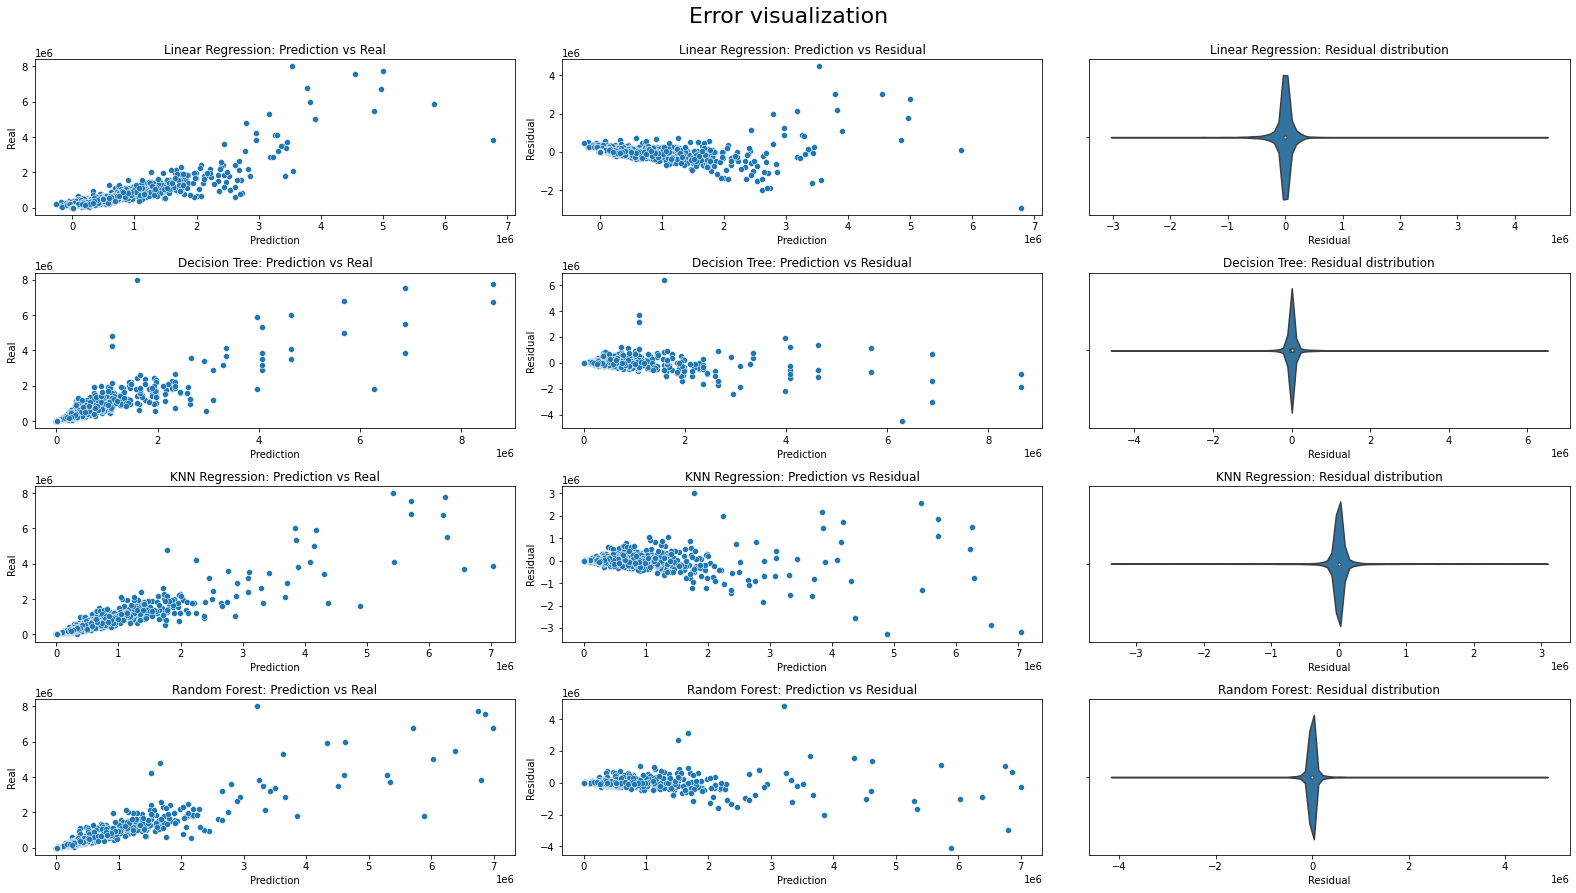

In [ ]:
from sklearn.metrics import mean_squared_error

fig, axs = plt.subplots(len(best_models), 3, figsize=(22, 12))

test_results = pd.DataFrame({
    'Sale RMSE': [],
    'Rent RMSE': [],
    'Model RMSE': []
})

i = 0
for model_name, (sale_model, rent_model) in best_models.iterrows():

    pred_sale = sale_model.predict(X_sale)
    pred_rent = rent_model.predict(X_rent)
    
    rmse_sale = mean_squared_error(y_sale, pred_sale, squared=False)
    rmse_rent = mean_squared_error(y_rent, pred_rent, squared=False)
    
    y_test = np.append(y_sale, y_rent)
    pred_model = np.append(pred_sale, pred_rent)
    rmse_model = mean_squared_error(y_test, pred_model, squared=False)
    
    test_results.loc[model_name, 'Sale RMSE'] = rmse_sale
    test_results.loc[model_name, 'Rent RMSE'] = rmse_rent
    test_results.loc[model_name, 'Model RMSE'] = rmse_model
    
    sns.scatterplot(x=pred_model, y=y_test, ax=axs[i][0])
    axs[i][0].set_title(f'{model_name}: Prediction vs Real')
    axs[i][0].set_xlabel('Prediction')
    axs[i][0].set_ylabel('Real')

    residual = y_test - pred_model
    sns.scatterplot(x=pred_model, y=residual, ax=axs[i][1])
    axs[i][1].set_title(f'{model_name}: Prediction vs Residual')
    axs[i][1].set_xlabel('Prediction')
    axs[i][1].set_ylabel('Residual')
    
    sns.violinplot(x=residual, ax=axs[i][2])
    axs[i][2].set_title(f'{model_name}: Residual distribution')
    axs[i][2].set_xlabel('Residual')
    
    i += 1

plt.suptitle("Error visualization", fontsize = 22, y=1.03)
plt.tight_layout()
plt.show()

Pela análise gráfica dos erros, podemos notar que os maiores valores de resíduo (ou seja, as predições em que os modelos mais erraram) são de imóveis com altos valores de venda (*outliers*). Como utilizamos o RMSE como medida de erro, essas grandes diferenças receberam uma penalização muito grande, resultando em um erro médio relativamente alto.

Olhando para a distribuição dos erros (violinplot), de fato percebemos uma grande concentração bem próximo do zero, porém com alguns valores bastante distantes do centro, de alguns milhões de reais.

In [ ]:
test_results.round(2)

,Sale RMSE,Rent RMSE,Model RMSE
Linear Regression,362304.11,1831.71,249223.14
Decision Tree,391687.60,1998.03,269435.64
KNN Regression,327603.07,1976.16,225354.22
Random Forest,327253.03,1789.38,225112.62


In [ ]:
print("Sale Errors")
sale_results = pd.DataFrame({
    'Train': train_results['Sale'],
    'Test': test_results['Sale RMSE'],
    'Train/Test': train_results['Sale'] / test_results['Sale RMSE']
})
sale_results.round(2)

Sale Errors


,Train,Test,Train/Test
Linear Regression,323720.45,362304.11,0.89
Decision Tree,312428.48,391687.60,0.80
KNN Regression,297108.78,327603.07,0.91
Random Forest,250921.44,327253.03,0.77


In [ ]:
print("Rent Errors")
rent_results = pd.DataFrame({
    'Train': train_results['Rent'],
    'Test': test_results['Rent RMSE'],
    'Train/Test': train_results['Rent'] / test_results['Rent RMSE']
})
rent_results.round(2)

Rent Errors


,Train,Test,Train/Test
Linear Regression,2029.37,1831.71,1.11
Decision Tree,2132.67,1998.03,1.07
KNN Regression,1979.31,1976.16,1.00
Random Forest,1898.82,1789.38,1.06


Comparando os erros no conjunto de treino e teste, alguns fatos podem ser observados.

Primeiramente, podemos ver que para os valores de venda (**Sale**), os erros dos modelos no dados de teste foram todos maiores que os erros de treinamento. Isso pode indicar uma tendência de **overfitting** dos modelos. Em especial, vale destacar o *Random Forest*, cujo resultado de teste foi muito pior do que o esperado pelo treinamento. Seguindo de perto, também vemos uma tendência grande de *overfit* no *Decision Tree*. Os modelos de *Linear Regression* e *KNN Regression* tiveram resultados mais próximos, com especial destaque para o **KNN Regression** que teve resultados muito próximos ao *Random Forest* nos teste mesmo aparecendo bastante atrás no treinamento.

De forma oposta, para os dados de aluguel (**Rent**) temos resultados de treinamento melhores do que obtidos nos testes para todos os modelos. Ou seja, poderíamos indicar aqui uma tendência de **underfitting** dos modelos. Nestes dados, o modelo de *Linear Regression* foi o que teve maior diferença entre treinamento e teste. Na outra ponta, o *KNN Regression* foi o que apresentou valores mais similiares, indicando um treinamento bastante justo para o que o modelo oferecia. O melhor desempenho nos dados de alugueis ficou com o **Random Forest**, que apresentou um erro consideravelmente menor que os outros modelos.

Os erros dos modelos de predição de venda ficaram entre 54% (*Random Forest*) e 64% (*Decision Tree*) do preço médio de venda dos imóveis (R\$ 609.655). No caso dos valores de aluguéis, os erros situaram-se entre 57% (*Random Forest*) e 63% (*Decision Tree*) do valor médio de alguel (R\$ 3.131).

### 4.5. Próximos passos

De forma geral, os modelos não tiveram um bom desempenho preditivo. Melhorias poderiam ser feitas em ajustes de hiperparâmetros, com testes adicionais, e uso de outros algorítmos.

Outro caminho de melhoria poderia ser no ajuste das variáveis independentes (*Feature Engineering*). Isso inclui o treinamento de modelos utilizando subconjuntos das colunas, combinação de variáveis gerando outras informações etc.